# Regressão Logística Multinomial

Para esta atividade usaremos um conjunto de dados sobre métricas do coração de pacientes, com o objetivo de determinar se o paciente é normal, suspeito ou com doença patológica. O conjunto de dado pode ser encontrado no [GitHub](https://raw.githubusercontent.com/bkrai/R-files-from-YouTube/main/Cardiotocographic.csv) de alguns usuários.

Abaixo encontra-se o dicionário de dados:

* LB: baseline value (SisPorto)
* AC: accelerations (SisPorto)
* FM: foetal movement (SisPorto)
* UC: uterine contractions (SisPorto)
* DL: light decelerations
* DS: severe decelerations
* DP: prolongued decelerations
* ASTV: percentage of time with abnormal short term variability (SisPorto)
* mSTV: mean value of short term variability (SisPorto)
* ALTV: percentage of time with abnormal long term variability (SisPorto)
* mLTV: mean value of long term variability (SisPorto)
* Width: histogram width
* Min: low freq. of the histogram
* Max: high freq. of the histogram
* Nmax: number of histogram peaks
* Nzeros: number of histogram zeros
* Mode: histogram mode
* Mean: histogram mean
* Median: histogram median
* Variance: histogram variance
* Tendency: histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric
* NSP: Normal=0; Suspect=1; Pathologic=2


O objetivo é entender/prever a variável `NSP` em função das demais.

Obs: Não se preocupe se não entender o significado de cada variável, estamos lidando com um problema técnico e provavelmente você não terá um especialista na área e nem tempo suficiente para entender sobre a área de negócio para este exercício. Foque na construção do modelo de regressão logística.

## Atividade 1: Importe o conjunto de dados, verifique se há dados faltantes e a correlação entre as variáveis.

In [40]:
# Importando as bibliotecas necessárias:

# pandas: biblioteca de manipulação e análise de dados.
import pandas as pd

# numpy: biblioteca para suporte a arrays e matrizes multidimensionais, além de funções matemáticas de alto nível.
import numpy as np

# matplotlib.pyplot: biblioteca para criação de gráficos e visualizações de dados em geral.
import matplotlib.pyplot as plt

# seaborn: biblioteca de visualização de dados baseada em matplotlib que oferece uma interface de alto nível para gráficos estatísticos.
import seaborn as sns

# warnings: biblioteca para lidar com avisos.
import warnings 

# Desabilitando os avisos para tornar a saída mais limpa. 
# Isso pode ser útil para evitar distrações, especialmente quando se sabe que determinado aviso pode ser ignorado.
warnings.filterwarnings('ignore')

In [41]:
# Carregando os dados novamente
df = pd.read_excel('cardio.xlsx')

df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [42]:
# Mostra um resumo conciso do DataFrame, incluindo a quantidade de valores não nulos em cada coluna, 
# o tipo de dado, e o uso de memória.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [43]:
# Verificando a presença de valores ausentes
missing_values = df.isnull().sum()

missing_values

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

## Atividade 2: Verifique se a variável está balanceada. Utilize o método SMOTE para fazer o balanceamento, se for necessário.

In [44]:
# Verificando o balanceamento da variável 'fraude'
class_balance = df['NSP'].value_counts()

class_balance

0    1655
1     295
2     176
Name: NSP, dtype: int64

In [45]:
# separando as variáveis dependente e independente
X = df.drop('NSP', axis=1)
y = df['NSP']

In [46]:
# Importando o método SMOTE (Synthetic Minority Over-sampling Technique) da biblioteca imblearn.
# Este método é usado para tratar conjuntos de dados desequilibrados, gerando exemplos sintéticos da classe minoritária.
from imblearn.over_sampling import SMOTE

# Instanciando o objeto SMOTE:
# - sampling_strategy='all': irá reamostrar todas as classes para ter o mesmo número da classe majoritária.
# - k_neighbors=3: o número de vizinhos para serem usados ao criar os exemplos sintéticos.
# - random_state=42: define a semente para a geração aleatória, garantindo que a reamostragem seja reproduzível.
sm = SMOTE(sampling_strategy='all', k_neighbors=3, random_state=42)

# Aplicando a reamostragem SMOTE aos dados.
# Isso retornará conjuntos de dados com classes balanceadas.
X, y = sm.fit_resample(X, y)

In [47]:
# Usando o método value_counts() para obter a contagem de cada classe única presente em 'y'.
# Isso ajudará a entender a distribuição ou equilíbrio entre as classes.
class_balance = y.value_counts()

# Exibindo a contagem de cada classe.
# Isso pode ser usado para confirmar se as classes foram balanceadas corretamente após a reamostragem.
class_balance


1    1655
0    1655
2    1655
Name: NSP, dtype: int64

## Atividade 3: Use as variáveis que achar relevante e separe as variáveis em $X$ e $y$, a seguir crie um modelo de regressão logística.

In [48]:
# Importando a API do statsmodels, uma biblioteca que fornece classes e funções para a estimação 
# de modelos estatísticos, bem como para a realização de testes estatísticos e exploração de dados estatísticos.
import statsmodels.api as sm

# Importando MNLogit de statsmodels.discrete.discrete_model.
# MNLogit (Multinomial Logistic Regression) é usado quando a variável de resposta é categórica e 
# tem mais de duas categorias. É uma extensão da regressão logística.
from statsmodels.discrete.discrete_model import MNLogit

In [49]:
# Adicionando uma coluna constante ao DataFrame 'X'. 
# Isso é feito para incluir um intercepto no modelo de regressão. 
# Sem esse passo, a regressão seria forçada a passar pela origem, o que nem sempre é desejável.
X = sm.add_constant(X)

In [50]:
# Criando um modelo de regressão logística multinomial usando MNLogit do statsmodels.
# O método fit() é chamado para treinar o modelo usando os dados fornecidos (X como variáveis independentes e y como variável dependente).
modelo = MNLogit(y, X).fit()

         Current function value: 0.267000
         Iterations: 35


In [51]:
# Usando o método 'predict' para obter as probabilidades previstas para cada classe.
# A função 'idxmax' é então usada para selecionar a classe (ou coluna) com a maior probabilidade prevista para cada observação.
# O argumento 'axis=1' garante que a operação 'idxmax' seja aplicada horizontalmente ao longo das colunas.
y_pred = modelo.predict(X).idxmax(axis=1)

In [52]:
# Exibindo o resumo estatístico do modelo de regressão logística multinomial.
# O resumo incluirá detalhes como coeficientes para cada variável, estatísticas de teste, 
# valores-p, entre outras informações úteis para avaliar a qualidade e significância do modelo.
print(modelo.summary())

                          MNLogit Regression Results                          
Dep. Variable:                    NSP   No. Observations:                 4965
Model:                        MNLogit   Df Residuals:                     4921
Method:                           MLE   Df Model:                           42
Date:                Sun, 13 Aug 2023   Pseudo R-squ.:                  0.7570
Time:                        16:52:17   Log-Likelihood:                -1325.7
converged:                      False   LL-Null:                       -5454.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
     NSP=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.0902      1.371    -12.464      0.000     -19.778     -14.403
LB            -0.1317      0.025     -5.223      0.000      -0.181      -0.082
AC         -1095.0500     82.119    -13.335      0.0

## Atividade 4: Faça previsões e avalie o modelo.

In [53]:
# Importando a função 'confusion_matrix' da biblioteca Scikit-Learn.
# Esta função é usada para calcular a matriz de confusão, que é uma representação 
# tabular do desempenho de um modelo de classificação.
from sklearn.metrics import confusion_matrix

# Calculando a matriz de confusão usando os valores verdadeiros 'y' e as previsões 'y_pred'.
matriz_confusao = confusion_matrix(y, y_pred)

# Exibindo a matriz de confusão.
matriz_confusao

array([[1495,  132,   28],
       [  69, 1420,  166],
       [   9,  126, 1520]], dtype=int64)

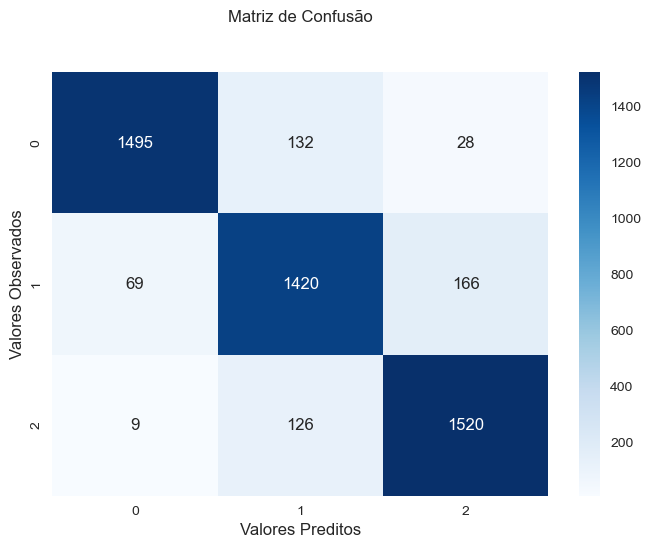

In [54]:
# Importando as bibliotecas necessárias para a visualização.
# Seaborn é uma biblioteca de visualização baseada em Matplotlib que fornece uma interface de alto nível para gráficos estatísticos.
# Matplotlib é uma biblioteca de plotting e visualização de dados para Python.
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um mapa de calor da matriz de confusão usando Seaborn.
# - 'annot=True' adiciona anotações à célula, ou seja, os valores numéricos da matriz.
# - 'fmt='d'' formata os números como inteiros (decimais).
# - 'cmap='Blues'' utiliza uma paleta de cores azuis.
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')

# Adicionando um título ao gráfico.
plt.title('Matriz de Confusão', y=1.1)

# Rotulando os eixos y e x.
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

Primeira linha (Classe 0 Observada):
1495 instâncias foram corretamente classificadas como classe 0 (verdadeiros positivos para classe 0).
132 instâncias da classe 0 foram incorretamente previstas como classe 1 (falsos negativos para classe 0 em relação à classe 1).
28 instâncias da classe 0 foram incorretamente previstas como classe 2 (falsos negativos para classe 0 em relação à classe 2).

Segunda linha (Classe 1 Observada):
69 instâncias da classe 1 foram incorretamente previstas como classe 0 (falsos negativos para classe 1 em relação à classe 0).
1420 instâncias foram corretamente classificadas como classe 1 (verdadeiros positivos para classe 1).
166 instâncias da classe 1 foram incorretamente previstas como classe 2 (falsos negativos para classe 1 em relação à classe 2).

Terceira linha (Classe 2 Observada):
9 instâncias da classe 2 foram incorretamente previstas como classe 0 (falsos negativos para classe 2 em relação à classe 0).
126 instâncias da classe 2 foram incorretamente previstas como classe 1 (falsos negativos para classe 2 em relação à classe 1).
1520 instâncias foram corretamente classificadas como classe 2 (verdadeiros positivos para classe 2).

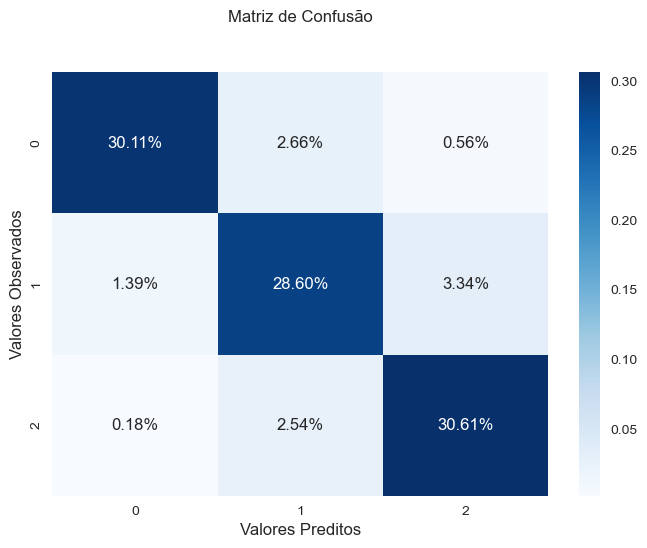

In [55]:
# Importando a biblioteca numpy para operações matemáticas.
import numpy as np

# Criando um mapa de calor da matriz de confusão usando Seaborn.
# Neste caso, a matriz de confusão é normalizada pela sua soma total, de modo que 
# os valores representem proporções em relação ao número total de previsões.
# - 'annot=True' adiciona anotações à célula, mostrando os valores numéricos da matriz.
# - 'fmt='.2%'' formata os números como porcentagens com duas casas decimais.
# - 'cmap='Blues'' utiliza uma paleta de cores azuis.
sns.heatmap(matriz_confusao/np.sum(matriz_confusao),
            annot=True, fmt='.2%', cmap='Blues')

# Adicionando um título ao gráfico.
plt.title('Matriz de Confusão', y=1.1)

# Rotulando os eixos y e x.
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [56]:
# Importando a função 'classification_report' da biblioteca Scikit-Learn.
# Esta função gera um relatório de classificação que exibe a precisão, 
# recall e pontuação F1 para cada classe do modelo.
from sklearn.metrics import classification_report

# Calculando e imprimindo o relatório de classificação usando os valores verdadeiros 'y' e as previsões 'y_pred'.
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1655
           1       0.85      0.86      0.85      1655
           2       0.89      0.92      0.90      1655

    accuracy                           0.89      4965
   macro avg       0.89      0.89      0.89      4965
weighted avg       0.89      0.89      0.89      4965



Classe 0:

Precision: De todas as instâncias que o modelo previu como classe 0, 95% delas eram realmente da classe 0.
Recall: De todas as instâncias verdadeiras da classe 0, o modelo identificou corretamente 90% delas.
F1-score: Esta é uma média harmônica de precisão e recall e indica uma boa combinação de ambos para a classe 0, sendo 93%.
Support: Há 1655 instâncias verdadeiras da classe 0 no conjunto de dados.

Classe 1:

Precision: De todas as instâncias que o modelo previu como classe 1, 85% eram realmente da classe 1.
Recall: De todas as instâncias verdadeiras da classe 1, o modelo identificou corretamente 86% delas.
F1-score: O F1-score para a classe 1 é de 85%, o que indica uma combinação razoável de precisão e recall.
Support: Há 1655 instâncias verdadeiras da classe 1 no conjunto de dados.

Classe 2:

Precision: De todas as instâncias que o modelo previu como classe 2, 89% eram realmente da classe 2.
Recall: De todas as instâncias verdadeiras da classe 2, o modelo identificou corretamente 92% delas.
F1-score: O F1-score para a classe 2 é de 90%, indicando uma boa combinação de precisão e recall.
Support: Há 1655 instâncias verdadeiras da classe 2 no conjunto de dados.

Médias:

Accuracy: Das todas as previsões feitas pelo modelo, 89% estavam corretas.
Macro avg: Calcula a média das métricas para cada rótulo, sem levar em conta o desequilíbrio de classes. Neste caso, tanto a precisão, recall quanto o F1-score são, em média, 89%.
Weighted avg: Calcula a média das métricas para cada rótulo, ponderando cada métrica pelo número de verdadeiras instâncias de cada classe (support). A precisão, recall e F1-score ponderados são todos 89%.

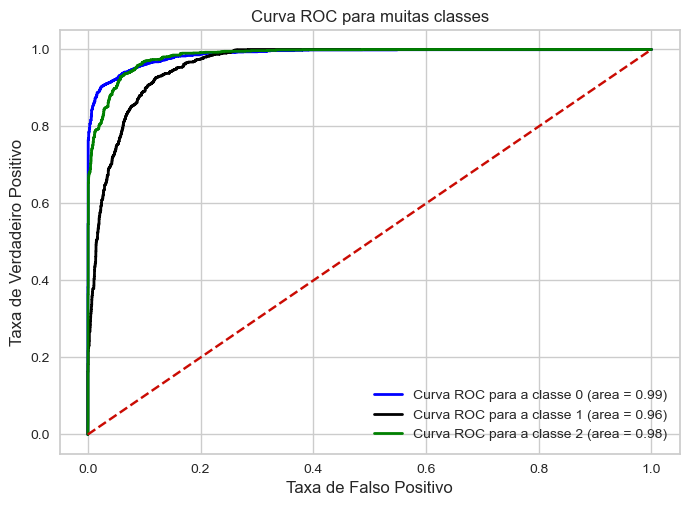

In [57]:
# Importando as bibliotecas necessárias
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Binarizando os rótulos para criar uma representação one-hot
# Isto transforma a saída 'y' (que tem 3 classes) em 3 colunas binárias.
y_cat = label_binarize(y, classes=[0, 1, 2])

# Inicializando dicionários para armazenar a taxa de falso positivo (FPR), taxa de verdadeiro positivo (TPR) e AUC para cada classe.
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
colors = ['blue','black','green','yellow']

# Loop para calcular FPR, TPR e AUC para cada classe
for i in range(n_classes):
    # Calculando a Curva ROC para a classe i
    fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], modelo.predict(X).iloc[:,i])
    # Calculando a área sob a Curva ROC (AUC) para a classe i
    roc_auc[i] = auc(fpr[i], tpr[i])

# Loop para plotar a Curva ROC para cada classe
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Curva ROC para a classe {i} (area = {round(roc_auc[i], 2)})')

# Adicionando a linha diagonal, representando um modelo de desempenho aleatório
plt.plot([0, 1], [0, 1], 'r--')
# Definindo o rótulo do eixo x
plt.xlabel('Taxa de Falso Positivo')
# Definindo o rótulo do eixo y
plt.ylabel('Taxa de Verdadeiro Positivo')
# Definindo o título do gráfico
plt.title('Curva ROC para muitas classes')
# Adicionando a legenda no canto inferior direito
plt.legend(loc="lower right")

## Atividade 5: Faça a previsão para um paciente que apresenta as seguintes características:

* `LB` = 121
* `AC` = 0.004176
* `FM` = 0.0
* `UC` = 0.007541
* `DL` = 0.003176
* `DS` = 0.0
* `DP` = 0.0
* `ASTV` = 20
* `mSTV` = 2.3
* `ALTV` = 0
* `mLTV` = 11.5
* `Width` = 129
* `Min` = 54
* `Max` = 171
* `Nmax` = 5
* `Nzeros` = 0
* `Mode` = 140
* `Mean` = 136
* `Median` = 123
* `Variance` = 14
* `Tendency` = 1

In [58]:
new_patient = pd.DataFrame({
    'const': [1],
    'LB': [121],
    'AC': [0.004176],
    'FM': [0.0],
    'UC': [0.007541],
    'DL': [0.003176],
    'DS': [0.0],
    'DP': [0.0],
    'ASTV': [20],
    'mSTV': [2.3],
    'ALTV': [0],
    'mLTV': [11.5],
    'Width': [129],
    'Min': [54],
    'Max': [171],
    'Nmax': [5],
    'Nzeros': [0],
    'Mode': [140],
    'Mean': [136],
    'Median': [123],
    'Variance': [14],
    'Tendency': [1]
})

new_patient

,const,LB,AC,FM,UC,DL,DS,DP,ASTV,mSTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,1,121,0.004176,0.0,0.007541,0.003176,0.0,0.0,20,2.3,...,129,54,171,5,0,140,136,123,14,1


In [59]:
prediction = modelo.predict(new_patient)

predicted_class = prediction.idxmax(axis=1)

print("A classe prevista para o paciente é: ", predicted_class[0])

A classe prevista para o paciente é:  0
